In [1]:
import torch
import os
import json
import matplotlib.pyplot as plt
import numpy as np


In [8]:
#####################################################################################
plt.rcParams["figure.dpi"] = 200
plt.rcParams["font.family"] = "Times New Roman"

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
# plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("axes", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
#####################################################################################

colors = {
    "subject": "green",
    "non_subject": "purple",
    "prompt_last": "darkorange",
    "subj_last": "blue"
}

linestyle = {
    "subject": "-",
    "non_subject": "--",
    "prompt_last": "dotted",
    "subj_last": "dashed"
}

def plot_knockout_results(processed_results, savepdf = None):

    plt.figure(figsize=(8, 5))
    for k, v in processed_results.items():

        # if k == "subj_last":
        #     continue

        mean = torch.stack(v).mean(dim=0)
        std = torch.stack(v).std(dim=0)
        stderr = std / len(v)**0.5

        plt.plot(mean, label=k, alpha = 0.8, color=colors[k], linestyle=linestyle[k])
        plt.fill_between(
            range(len(mean)),
            mean - stderr,
            mean + stderr,
            alpha=0.1,
            color=colors[k],
            edgecolor="none",
        )

    plt.ylim(-1.08, 0.6)
    plt.hlines(0, 0, len(mean), linestyles="-", colors="black")
    plt.legend(ncol = 4, bbox_to_anchor=(0.5, -.35), loc='lower center', frameon=False)
    plt.xlim(-1, len(mean)+1)

    def layer_tick(layer_idx, jump=5):
        return f"{layer_idx}" if layer_idx % jump == 0 else ""

    plt.xticks(
        np.arange(len(mean)),
        [layer_tick(i) for i in range(len(mean))]
    )

    plt.yticks(np.arange(-1.0, 0.6, 0.25))

    plt.xlabel("Layer")
    plt.ylabel("Relative change in p(ans)")
    plt.tight_layout()

    if savepdf is not None:
        os.makedirs(os.path.dirname(savepdf), exist_ok=True)
        plt.savefig(savepdf, bbox_inches="tight", dpi=300)

    plt.show()

In [9]:
def process_results(knock_out_results):
    processed_results = {k: [] for k in knock_out_results[0]["knock_out_from_last"].keys()}

    for result in knock_out_results:
        p_ans = result["p_answer"]
        for k, v in result["knock_out_from_last"].items():
            relative_change = (torch.Tensor(v) - p_ans) / p_ans
            processed_results[k].append(relative_change)
    
    return processed_results

['country_capital_city.json', 'person_plays_pro_sport.json', 'company_hq.json', 'landmark_in_country.json', 'person_occupation.json', 'product_by_company.json', 'place_in_city.json']
country_capital_city.json --> 17 samples


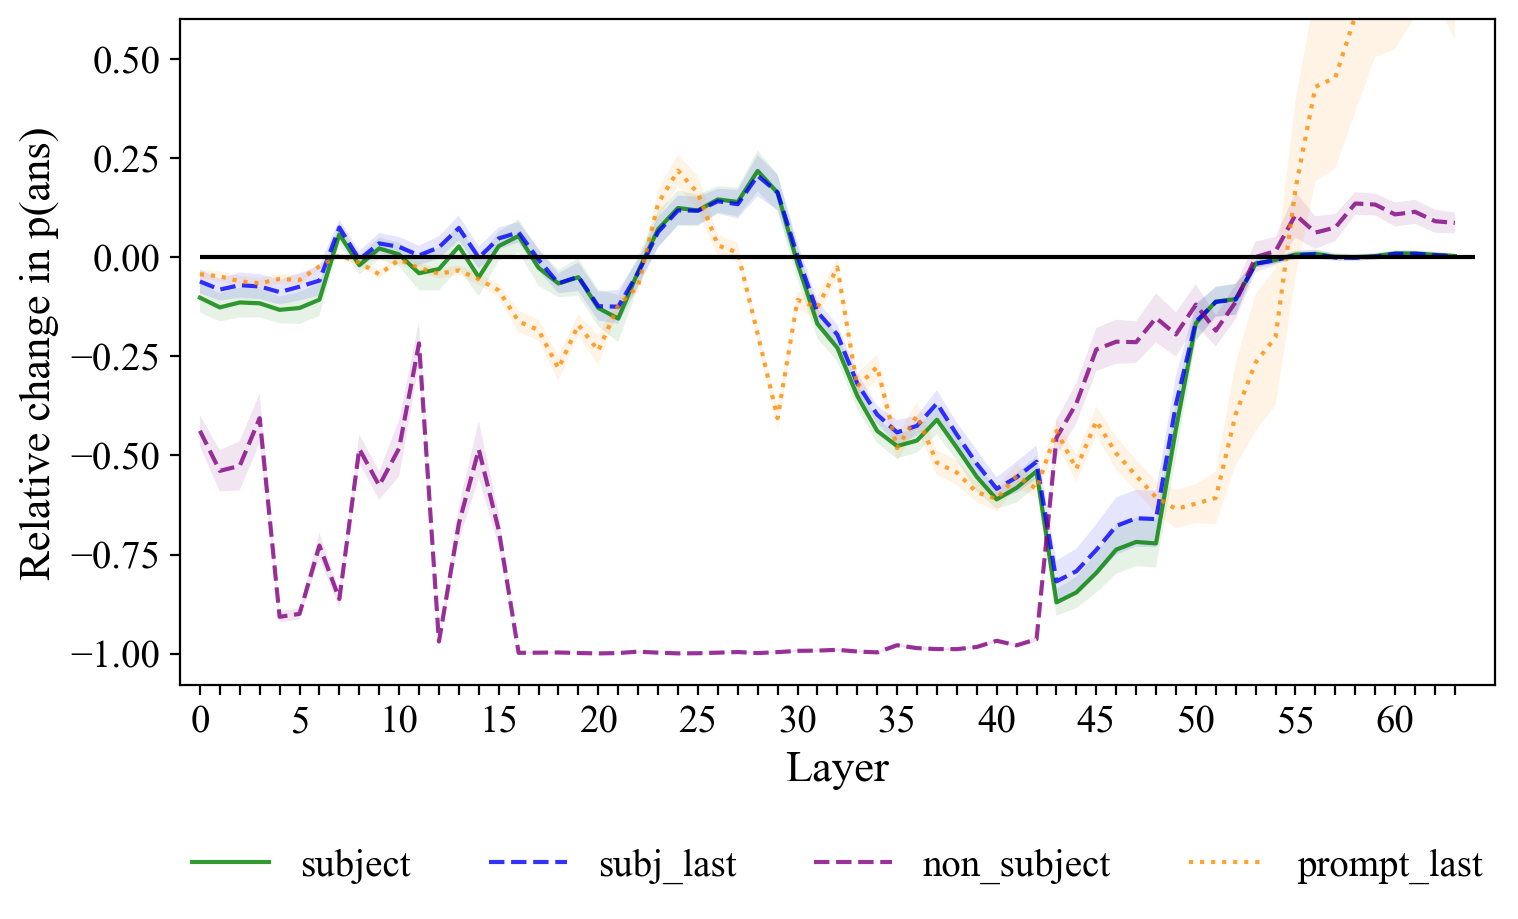

person_plays_pro_sport.json --> 150 samples


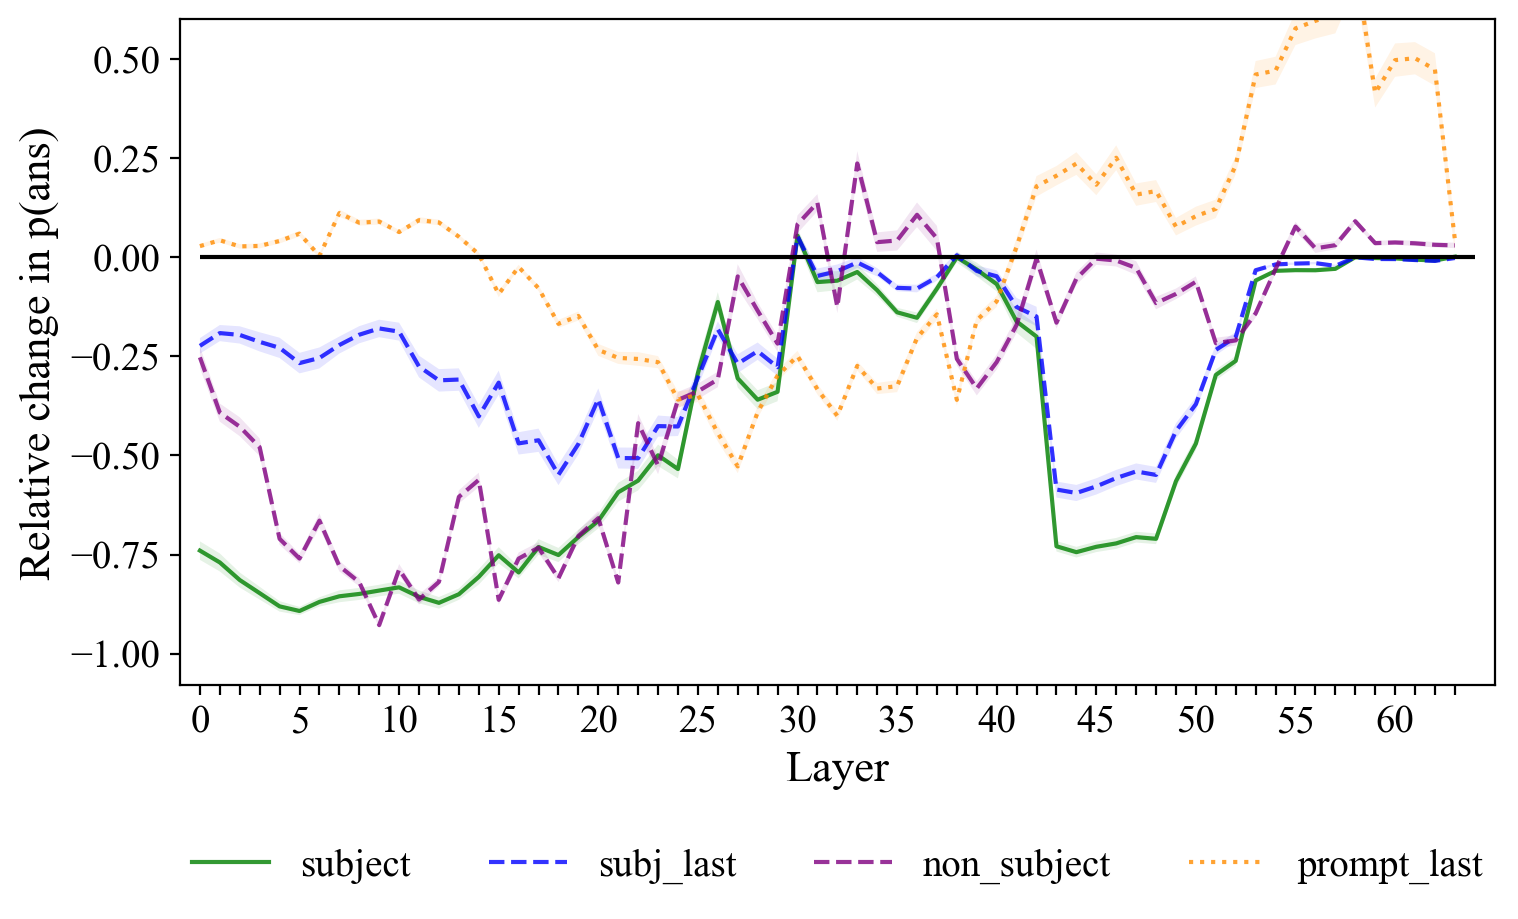

company_hq.json --> 150 samples


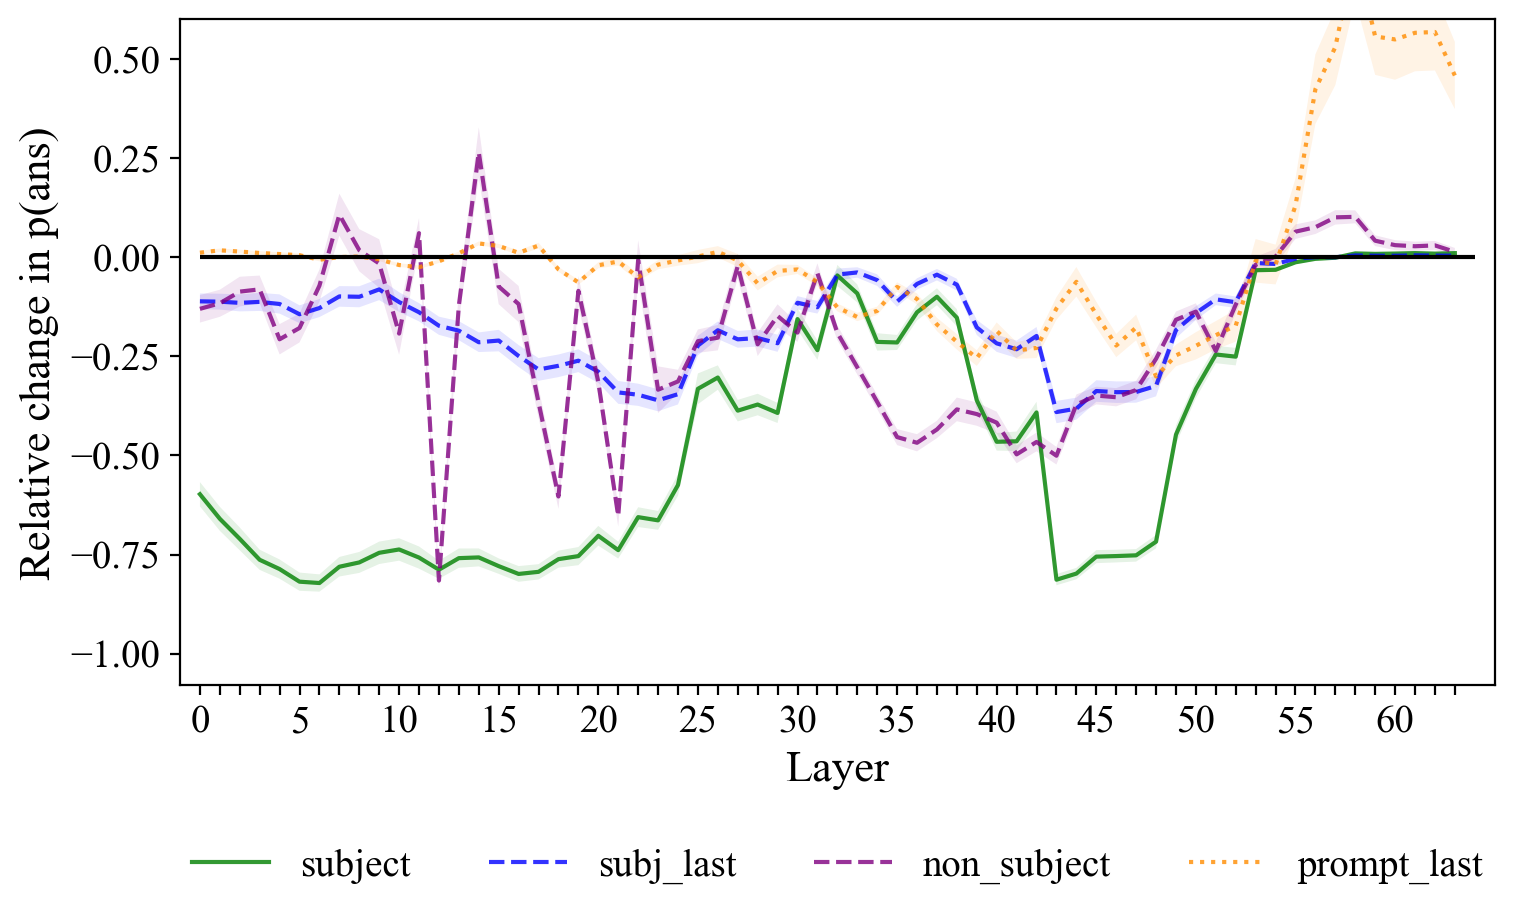

landmark_in_country.json --> 150 samples


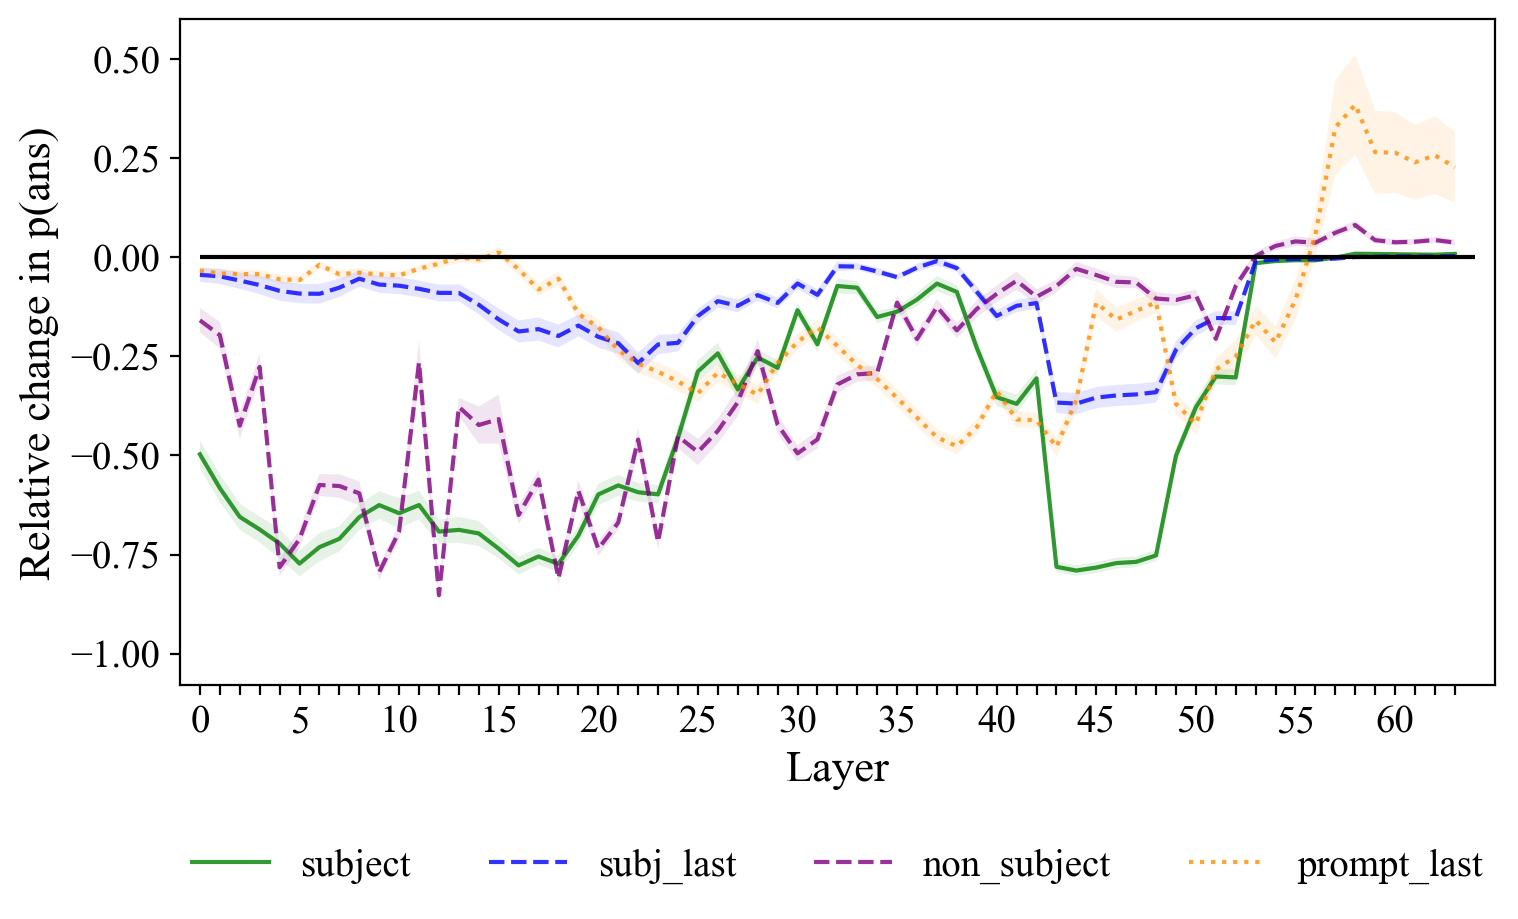

person_occupation.json --> 52 samples


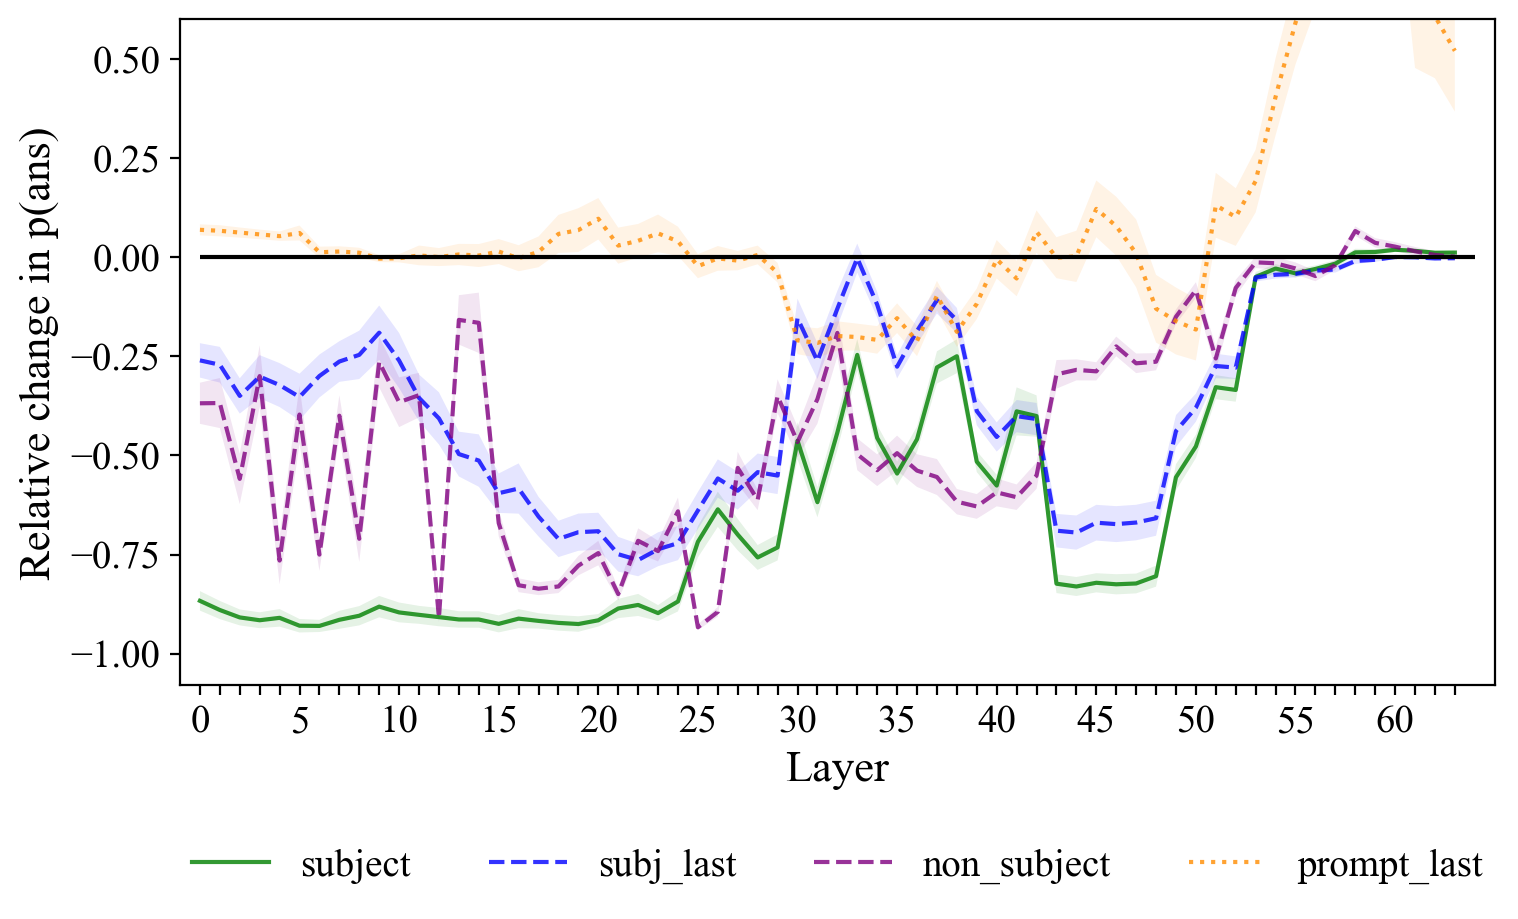

product_by_company.json --> 150 samples


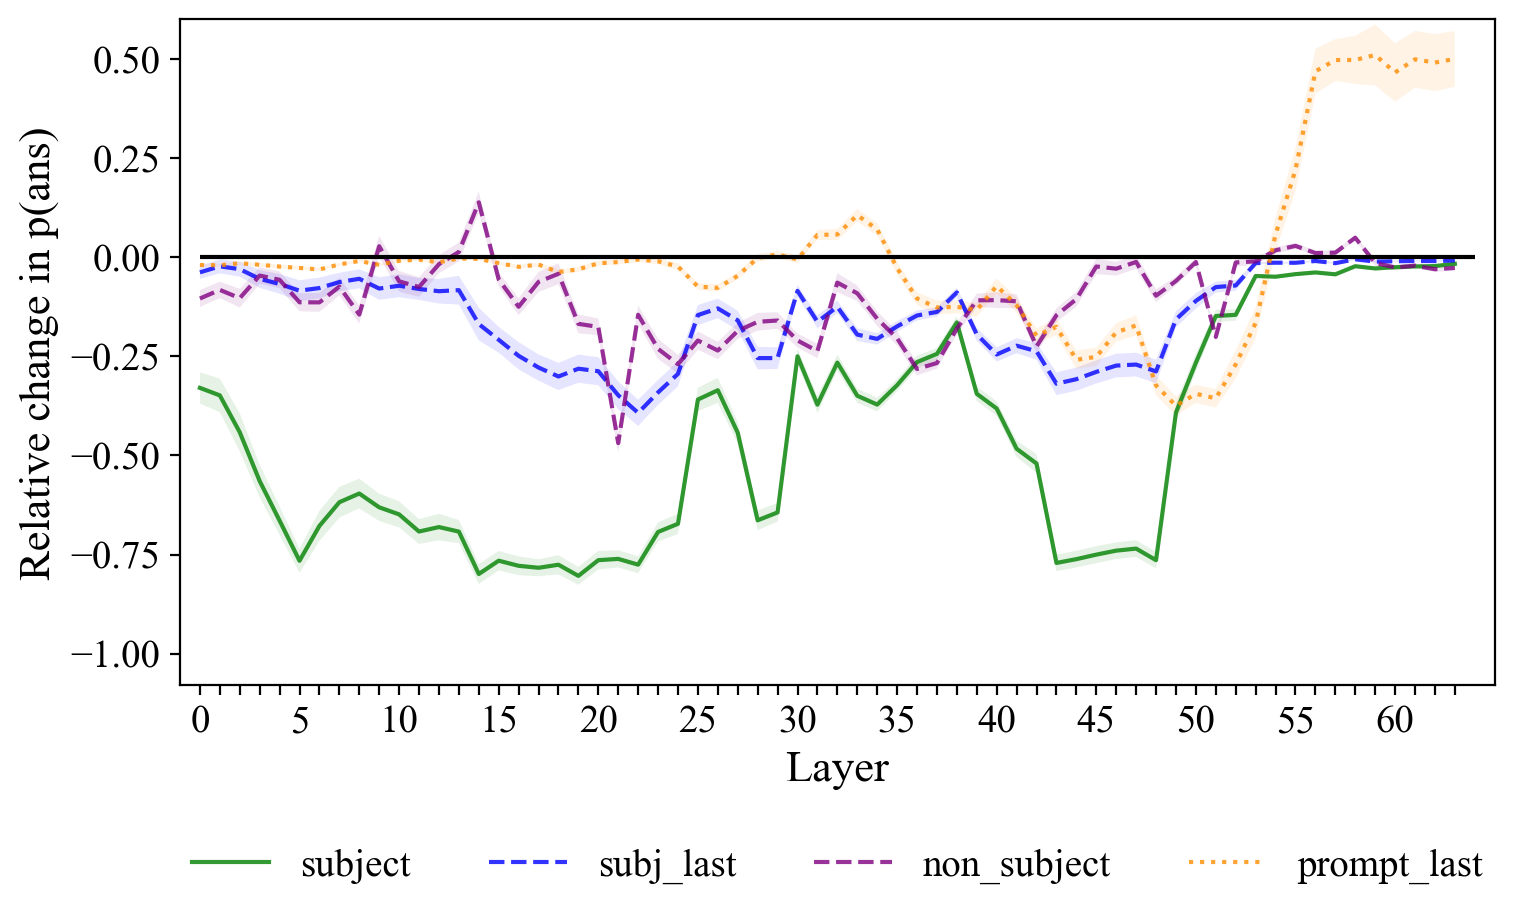

place_in_city.json --> 99 samples


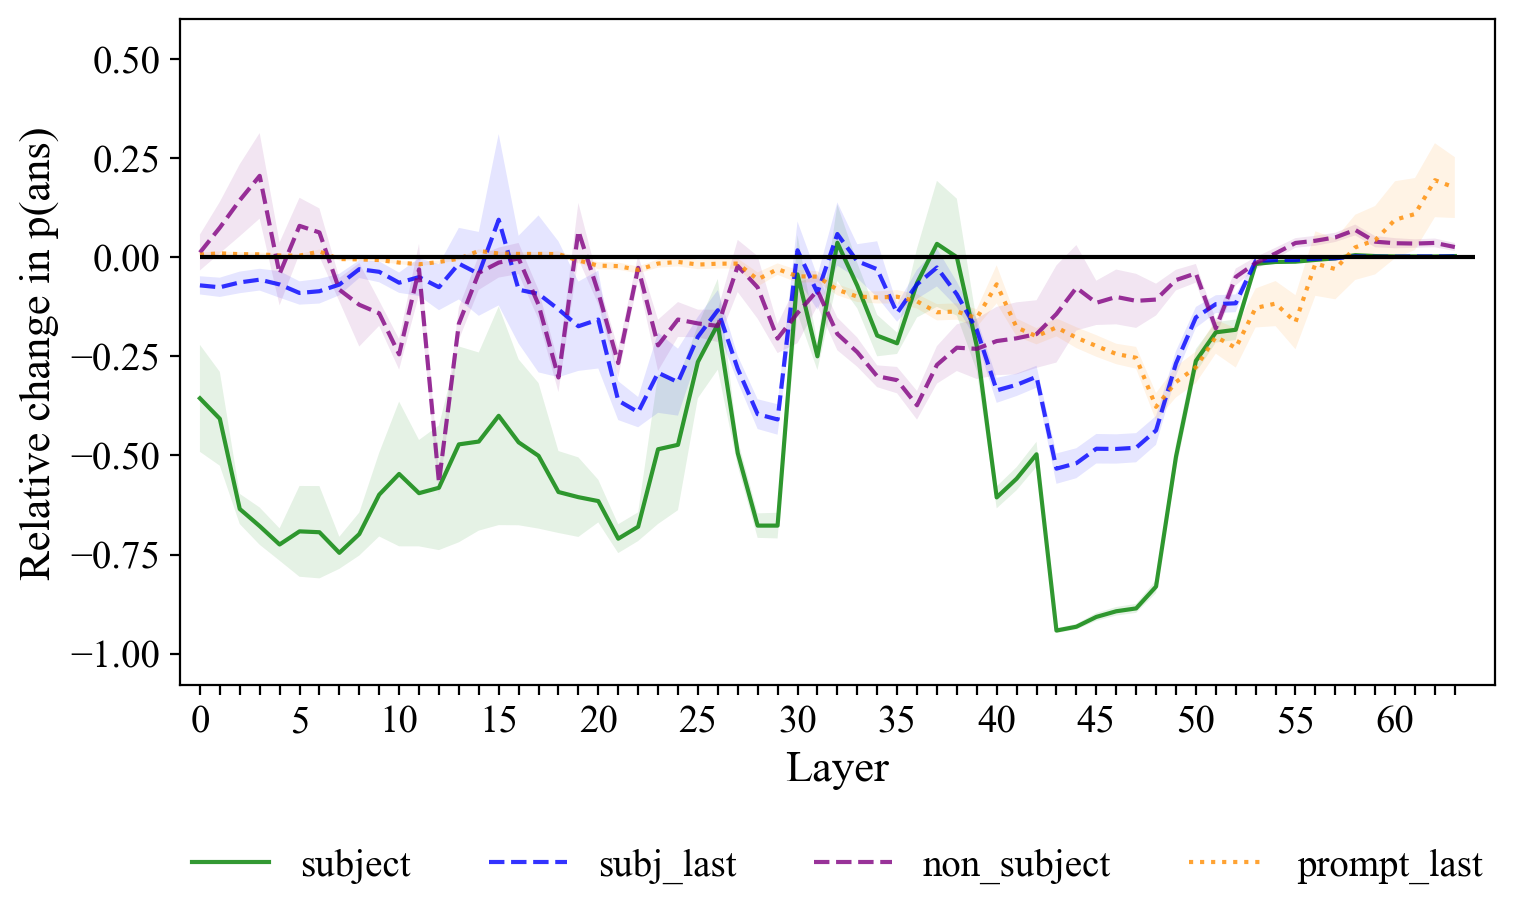

In [10]:
RESULT_DIR = "../../results/knockout"

print(os.listdir(RESULT_DIR))

knock_out_results = []
for relation in os.listdir(RESULT_DIR):
    with open(os.path.join(RESULT_DIR, relation), "r") as f:
        current_results = json.load(f)
    
    print(f"{relation} --> {len(current_results)} samples")

    processed_results = process_results(current_results)

    knock_out_results += current_results

    plot_knockout_results(processed_results)

Total samples: 768


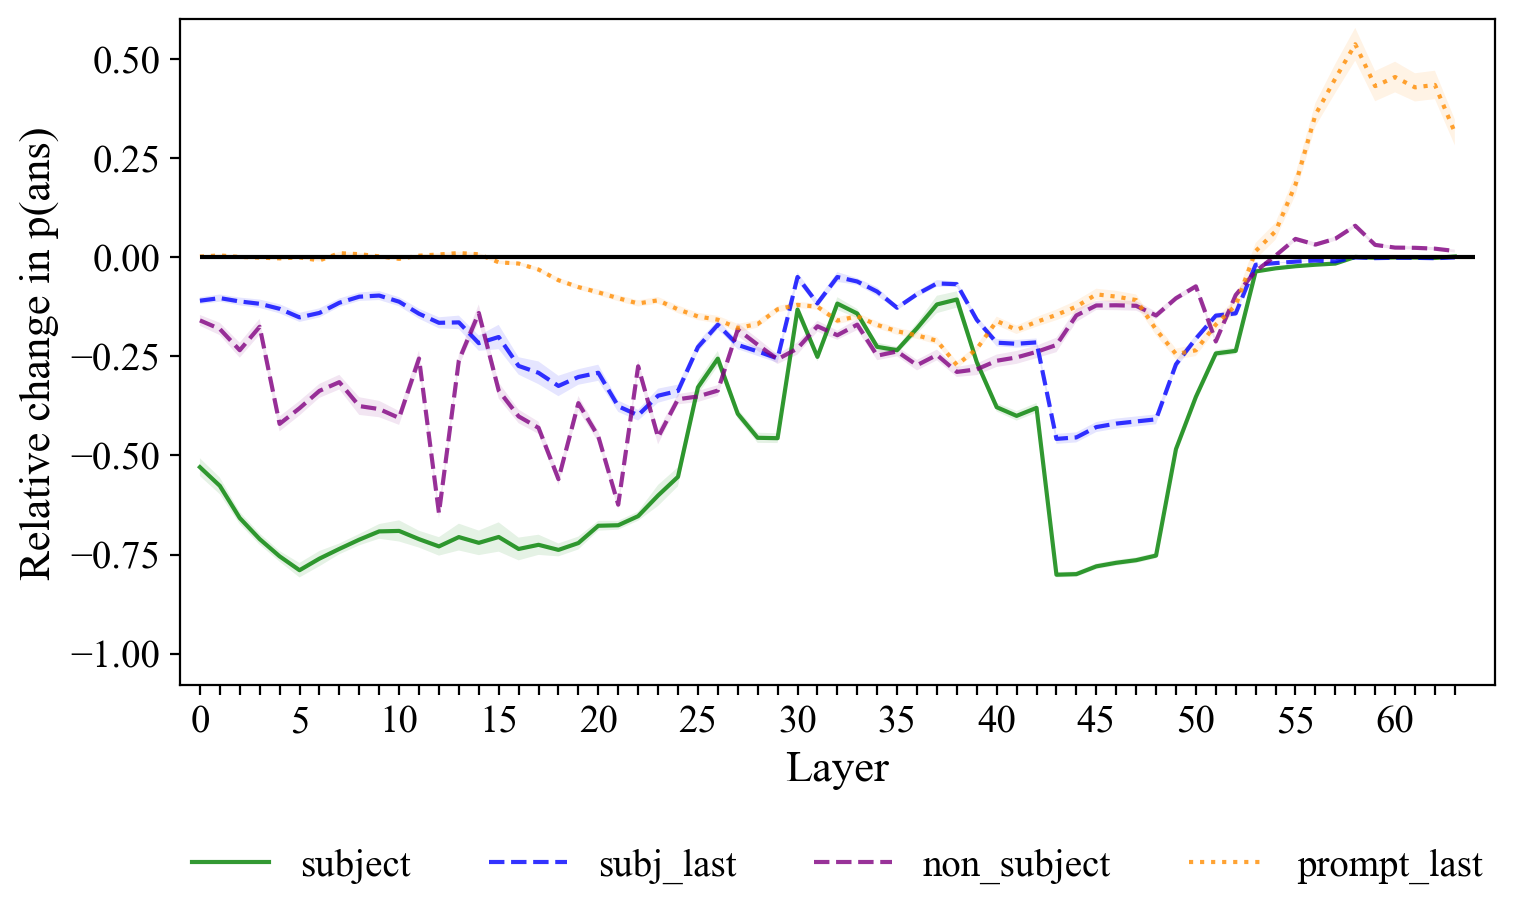

In [11]:
print(f"Total samples: {len(knock_out_results)}")

processed_results = process_results(knock_out_results)
plot_knockout_results(
    processed_results,
    savepdf="../../Figures/knockout/mamba_combined.pdf"
)

In [7]:
processed_results.keys()

dict_keys(['subject', 'subj_last', 'non_subject', 'prompt_last'])